# Irises Classification

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## PREPARE DATA

In [2]:
#Load dataset
dataset = pd.read_csv("Dataset/iris.data",header = None)
#Grab values
dataset = dataset.values
#Shuffle dataset
np.random.shuffle(dataset)
#First 100 samples are training dataset
train = dataset[:100]
#Other samples are test dataset
test = dataset[100:]
#Grab features
train_features = train[:,:4]
test_features = test[:,:4]
#Grab labels
train_labels = train[:,-1]
test_labels = test[:,-1]

#Change categorical labels to numbers
#Train labels
for index, item in enumerate(train_labels):
    if item == 'Iris-setosa':
        train_labels[index] = 0
    elif item == 'Iris-versicolor':
        train_labels[index] = 1
    elif item == 'Iris-virginica':
        train_labels[index] = 2
#Test labels
for index, item in enumerate(test_labels):
    if item == 'Iris-setosa':
        test_labels[index] = 0
    elif item == 'Iris-versicolor':
        test_labels[index] = 1
    elif item == 'Iris-virginica':
        test_labels[index] = 2

In [3]:
#Change labels type from object to int
train_labels = train_labels.astype(np.int32)
test_labels = test_labels.astype(np.int32)

In [ ]:
#Standardize features
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [5]:
#Create hot-encode vector
train_hot_encode = np.zeros((len(train_labels), 3))
train_hot_encode[np.arange(len(train_labels)), train_labels] = 1

test_hot_encode = np.zeros((len(test_labels), 3))
test_hot_encode[np.arange(len(test_labels)), test_labels] = 1

## CREATE MODEL

In [6]:
#Number of neurons in each layers
Input = 4
Hidden = 8
Output = 3

In [7]:
#Placeholders
X = tf.placeholder(tf.float32, [None, Input])
Y_true = tf.placeholder(tf.float32, [None, Output])

In [8]:
#Weights and biases
W1 = tf.Variable(tf.truncated_normal([Input, Hidden], stddev=0.1))
b1 = tf.Variable(tf.zeros([Hidden]))

W2 = tf.Variable(tf.truncated_normal([Hidden, Output], stddev=0.1))
b2 = tf.Variable(tf.zeros([Output]))

In [11]:
#Create layers
Y1 = tf.nn.relu(tf.matmul(X, W1) + b1)

#Softmax
Ylogits = tf.matmul(Y1, W2) + b2
Y = tf.nn.softmax(Ylogits)

In [12]:
#Loss function
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits, labels=Y_true)
cross_entropy = tf.reduce_mean(cross_entropy)
                                                          
#Accuracy
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_true, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

#Optimizer
train_step = tf.train.AdamOptimizer(learning_rate=0.003).minimize(cross_entropy)

## TRAIN MODEL

In [ ]:
#Epochs and batch size
num_epochs = 500
batchsize= 100

#Init global variables
init = tf.global_variables_initializer()

#Empty lists to plots
train_losses = list()
train_acc = list()
test_losses = list()
test_acc = list()

#Create session
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        for i in range(0,len(train_features),batchsize):
            batch_X_train =train_features[i:i+batchsize]
            batch_Y_train =train_hot_encode[i:i+batchsize]
            
            #Two lines to visualization data (not to training)
            acc_trn, loss_trn = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X_train, Y_true: batch_Y_train})
            acc_tst, loss_tst = sess.run([accuracy, cross_entropy], feed_dict={X: test_features, Y_true: test_hot_encode})
            
            #Print statistics
            print("epoch{0} #{1} Trn acc={2:2.3f} , Trn loss={3:3.3f} Tst acc={4:2.3f} , Tst loss={5:3.3f}".format(epoch,i,acc_trn,loss_trn,acc_tst,loss_tst))
                
            #Add accuracy and loss to lists
            train_losses.append(loss_trn)
            train_acc.append(acc_trn)
            test_losses.append(loss_tst)
            test_acc.append(acc_tst)
            
            #TRAIN MODEL
            sess.run(train_step, feed_dict={X: batch_X_train, Y_true: batch_Y_train})

## PLOTS

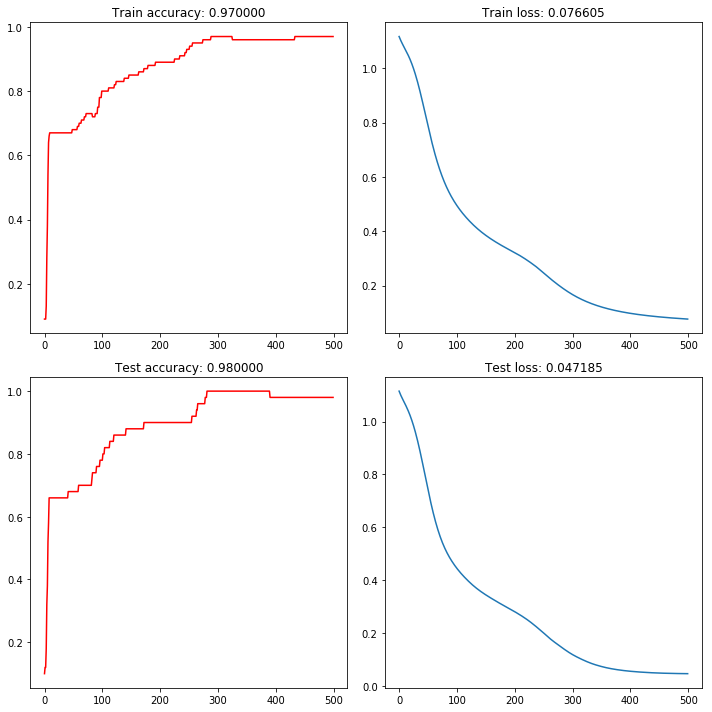

In [14]:
#Plots
fig = plt.figure(figsize=(10,10)) 
plt.subplot(2,2,1)
plt.title('Train accuracy: %f' %train_acc[-1])
plt.plot(range(len(train_acc)), train_acc, color='r')
plt.subplot(2,2,2)
plt.title('Train loss: %f' %train_losses[-1])
plt.plot(range(len(train_losses)), train_losses)
plt.subplot(2,2,3)
plt.title('Test accuracy: %f' %test_acc[-1])
plt.plot(range(len(test_acc)), test_acc, color='r')
plt.subplot(2,2,4)
plt.title('Test loss: %f' %test_losses[-1])
plt.plot(range(len(test_losses)), test_losses)
plt.tight_layout()